### Análisis Exploratorio Titanic

#### 1. Cargar Librerías

In [1]:
##Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Funciones 

In [2]:
### Función cargar data sea .csv o .xlsx
def importDatos(ruta, archivo, ext):
    if ext == '.csv':
        data = pd.read_csv(ruta+archivo+ext)
        return data
    elif ext == '.xlsx':
        data = pd.read_excel(ruta+archivo+ext)
        return data
    else:
        print('Extensión Diferente')

## Función para datos NAN -> Null -> 0 (IRQ) -> NAN
def datos_NAN(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimesiones: %d filas, %d columnas" % (df.shape[0], df.shape[1]))
        print("Total de Valores NAN: %d" % (total_na))
        print("%40s %10s  %10s %10s" % ("Nombre Columna", "Tipo Dato", "#Unicos", "Cant Valores NAN"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%40s %10s  %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
    else:
        print("Se esperaba un dataframe: %15s" % (type(df)))

##Función para identificación de variables categóricas
def idenCat(df):
    categoricas = [i for i in df.columns if df[i].dtype=='O']
    print('Hay {} Variables Categoricas \n'. format(len(categoricas)))
    print('Las Variables Categoricas son: \n', categoricas)

def histoplot(df, nomCol, anchoBar):
    sns.histplot(data=df, x=nomCol, binwidth=anchoBar, kde=True)

##FUncion reemplazo de datos categóricos NAN
def imputacionCatNA(df, nomCol):
    df[nomCol] = df[nomCol].fillna(df[nomCol].mode()[0])
    return df[nomCol]

##Función para One Hot Encoder o Variables dummies
def convDummies(df, nomCol):
    dummies = pd.get_dummies(df[nomCol])
    data = pd.concat([df, dummies], axis=1)
    data.drop(columns=[nomCol], inplace=True)
    return data

##Función cambiar encabezados
def cambEncab(df, ListaN):
    df.columns = ListaN
    return df

##Funcion de extracción
def export(df, nombre, sepa, indice):
    data = df.to_csv(nombre, sep=sepa, index= indice)
    return data

#### Análisis Inicial

In [3]:
data = importDatos('./Datasets/','Titanic','.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
datos_NAN(data)

Dimesiones: 891 filas, 12 columnas
Total de Valores NAN: 866
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                             PassengerId      int64         891          0
                                Survived      int64           2          0
                                  Pclass      int64           3          0
                                    Name     object         891          0
                                     Sex     object           2          0
                                     Age    float64          88        177
                                   SibSp      int64           7          0
                                   Parch      int64           7          0
                                  Ticket     object         681          0
                                    Fare    float64         248          0
                                   Cabin     object         147        687
                                E

In [5]:
### Función para determinar datos categóricos
categoricas = [i for i in data.columns if data[i].dtype=='O']

print('Hay {} Variables Categoricas \n'. format(len(categoricas)))

print('Las Variables Categoricas son: \n', categoricas)

Hay 5 Variables Categoricas 

Las Variables Categoricas son: 
 ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [6]:
idenCat(data)

Hay 5 Variables Categoricas 

Las Variables Categoricas son: 
 ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [7]:
numericas = [i for i in data.columns if data[i].dtype!='O']

print('Hay {} Variables numericas \n'. format(len(numericas)))

print('Las Variables numericas son: \n', numericas)

Hay 7 Variables numericas 

Las Variables numericas son: 
 ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [8]:
##Distribución de frecuencias
for i in categoricas:
    print(round(data[i].value_counts()/np.float64(len(data)),3)*100)

Braund, Mr. Owen Harris                     0.1
Boulos, Mr. Hanna                           0.1
Frolicher-Stehli, Mr. Maxmillian            0.1
Gilinski, Mr. Eliezer                       0.1
Murdlin, Mr. Joseph                         0.1
                                           ... 
Kelly, Miss. Anna Katherine "Annie Kate"    0.1
McCoy, Mr. Bernard                          0.1
Johnson, Mr. William Cahoone Jr             0.1
Keane, Miss. Nora A                         0.1
Dooley, Mr. Patrick                         0.1
Name: Name, Length: 891, dtype: float64
male      64.8
female    35.2
Name: Sex, dtype: float64
347082      0.8
CA. 2343    0.8
1601        0.8
3101295     0.7
CA 2144     0.7
           ... 
9234        0.1
19988       0.1
2693        0.1
PC 17612    0.1
370376      0.1
Name: Ticket, Length: 681, dtype: float64
B96 B98        0.4
G6             0.4
C23 C25 C27    0.4
C22 C26        0.3
F33            0.3
              ... 
E34            0.1
C7             0.1
C54   

In [9]:
for i in numericas:
    print(round(data[i].value_counts()/np.float64(len(data)),3)*100)

1      0.1
599    0.1
588    0.1
589    0.1
590    0.1
      ... 
301    0.1
302    0.1
303    0.1
304    0.1
891    0.1
Name: PassengerId, Length: 891, dtype: float64
0    61.6
1    38.4
Name: Survived, dtype: float64
3    55.1
1    24.2
2    20.7
Name: Pclass, dtype: float64
24.00    3.4
22.00    3.0
18.00    2.9
19.00    2.8
28.00    2.8
        ... 
36.50    0.1
55.50    0.1
0.92     0.1
23.50    0.1
74.00    0.1
Name: Age, Length: 88, dtype: float64
0    68.2
1    23.5
2     3.1
4     2.0
3     1.8
8     0.8
5     0.6
Name: SibSp, dtype: float64
0    76.1
1    13.2
2     9.0
5     0.6
3     0.6
4     0.4
6     0.1
Name: Parch, dtype: float64
8.0500     4.8
13.0000    4.7
7.8958     4.3
7.7500     3.8
26.0000    3.5
          ... 
35.0000    0.1
28.5000    0.1
6.2375     0.1
14.0000    0.1
10.5167    0.1
Name: Fare, Length: 248, dtype: float64


#### Limpieza

In [10]:
data['Name']

data['Inicial']=0

for i in data:
    data['Inicial'] = data.Name.str.extract('([A-Za-z]+)\.')

data.Inicial

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Inicial, Length: 891, dtype: object

In [11]:
##Cruzar variables tablas.
pd.crosstab(data.Inicial, data.Sex).T.style.background_gradient(cmap='summer_r')

Inicial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


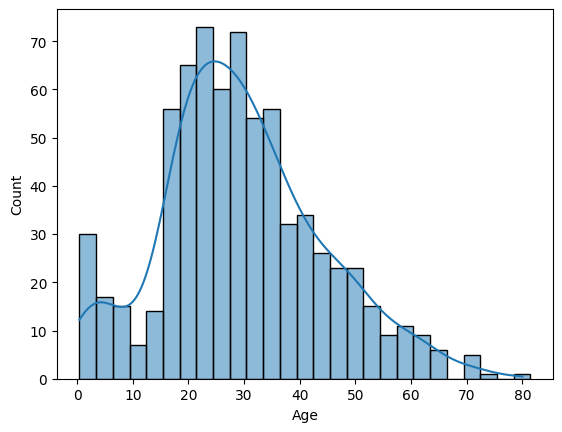

In [12]:
##Histograma de edades 
histoplot(data, 'Age', 3)

In [13]:
data['Inicial'].replace(['Mlle','Mme', 'Ms','Dr','Major', 'Lady','Countess','Jonkheer'
                         , 'Col','Rev','Capt','Sir','Don','Master'], ['Miss','Miss','Miss','Mr','Mr','Mrs'
                                                             ,'Mrs','Other','Other','Other','Mr','Mr','Mr','Child'],
                           inplace=True)

In [14]:
data.Inicial.value_counts()

Mr       529
Miss     186
Mrs      127
Child     40
Other      9
Name: Inicial, dtype: int64

In [15]:
round(data.groupby('Inicial')['Age'].median(),0)

Inicial
Child     4.0
Miss     22.0
Mr       30.0
Mrs      35.0
Other    51.0
Name: Age, dtype: float64

In [16]:
###No es util para el ejercicio
round(data.groupby('Sex')['Age'].mean(),0)

Sex
female    28.0
male      31.0
Name: Age, dtype: float64

In [17]:
##Reemplazar datos NAN en Age con base en la tipología
data.loc[(data.Age.isnull())&(data.Inicial=='Mr'), 'Age']=30
data.loc[(data.Age.isnull())&(data.Inicial=='Mrs'), 'Age']=35
data.loc[(data.Age.isnull())&(data.Inicial=='Child'), 'Age']=4
data.loc[(data.Age.isnull())&(data.Inicial=='Miss'), 'Age']=22
data.loc[(data.Age.isnull())&(data.Inicial=='Other'), 'Age']=51

datos_NAN(data)

Dimesiones: 891 filas, 13 columnas
Total de Valores NAN: 689
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                             PassengerId      int64         891          0
                                Survived      int64           2          0
                                  Pclass      int64           3          0
                                    Name     object         891          0
                                     Sex     object           2          0
                                     Age    float64          88          0
                                   SibSp      int64           7          0
                                   Parch      int64           7          0
                                  Ticket     object         681          0
                                    Fare    float64         248          0
                                   Cabin     object         147        687
                                E

In [18]:
##Imputación CAT NAN Embarked
data['Embarked'] = imputacionCatNA(data, 'Embarked')

datos_NAN(data)

Dimesiones: 891 filas, 13 columnas
Total de Valores NAN: 687
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                             PassengerId      int64         891          0
                                Survived      int64           2          0
                                  Pclass      int64           3          0
                                    Name     object         891          0
                                     Sex     object           2          0
                                     Age    float64          88          0
                                   SibSp      int64           7          0
                                   Parch      int64           7          0
                                  Ticket     object         681          0
                                    Fare    float64         248          0
                                   Cabin     object         147        687
                                E

In [19]:
##Eliminar Columna de Cabina
datos = data

cabina = data['Cabin']

data.drop(['Cabin', 'PassengerId'], axis=1, inplace=True)

#### Graficas importantes

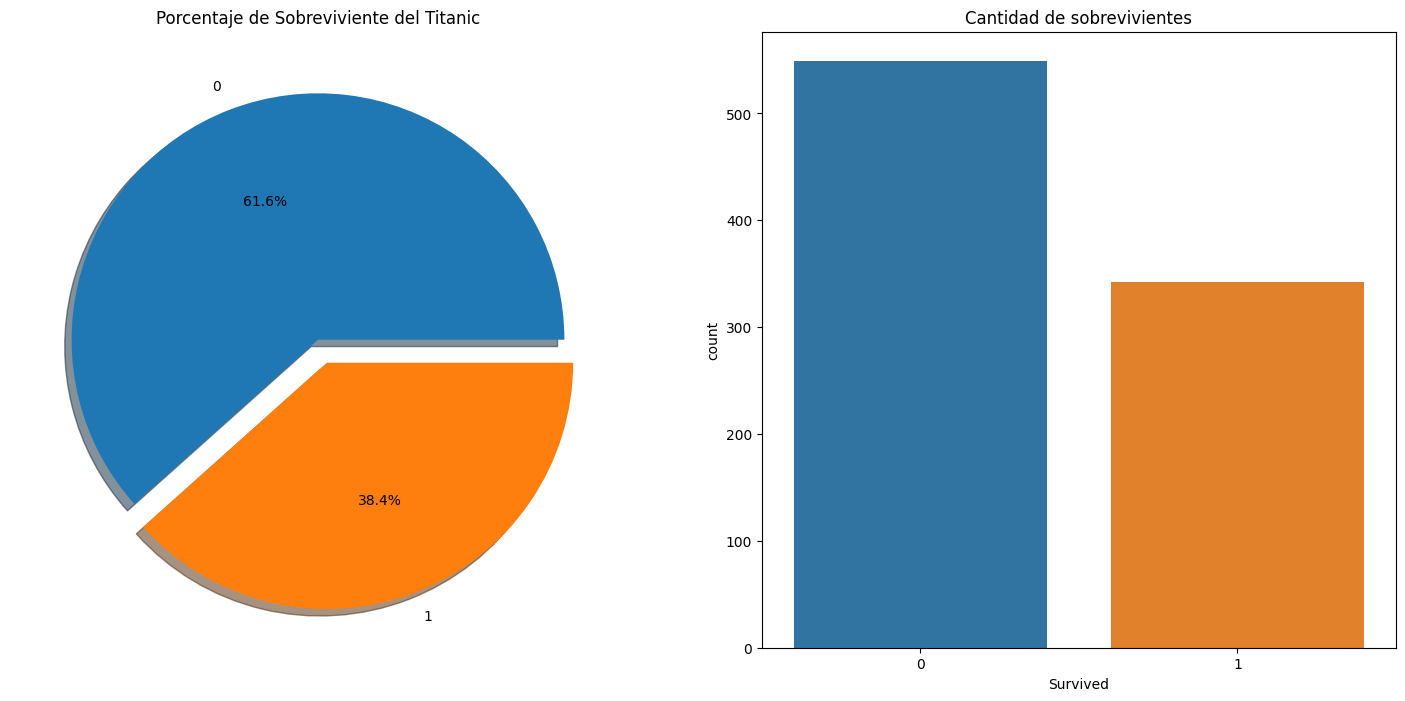

In [20]:
##Cuántas personas sobrevivieron o fallecieron?

f, ax = plt.subplots(1, 2, figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Porcentaje de Sobreviviente del Titanic')
ax[0].set_ylabel('')

sns.countplot( data=data,ax=ax[1], x='Survived')
ax[1].set_title('Cantidad de sobrevivientes')

plt.show()

In [21]:
##Analisis de tablas cruzadas
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

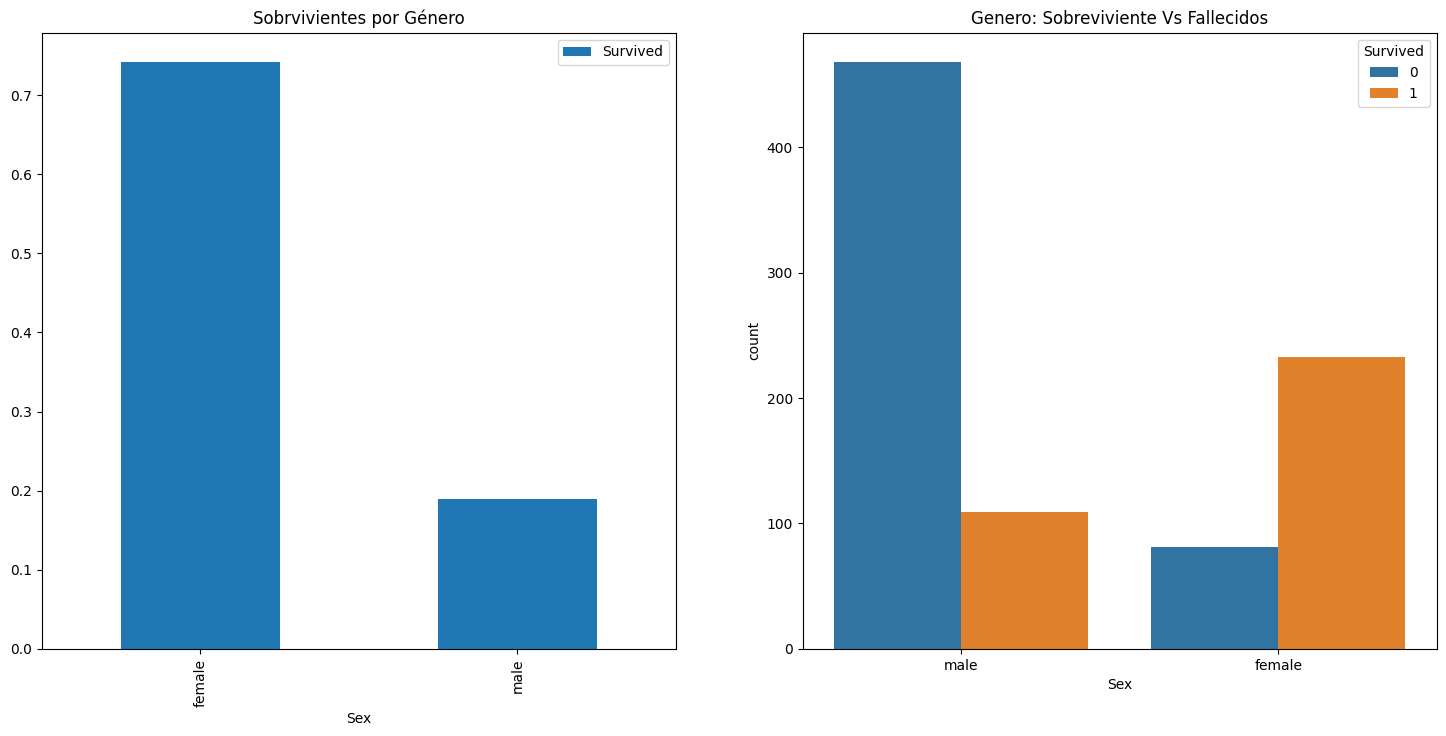

In [22]:
##Cruzar valores SEX, Survived
f, ax = plt.subplots(1,2, figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Sobrvivientes por Género')

sns.countplot(data=data, x='Sex', hue='Survived')
ax[1].set_title('Genero: Sobreviviente Vs Fallecidos')

plt.show()


In [23]:
##Tabla cruzada con clases Vs Survived
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


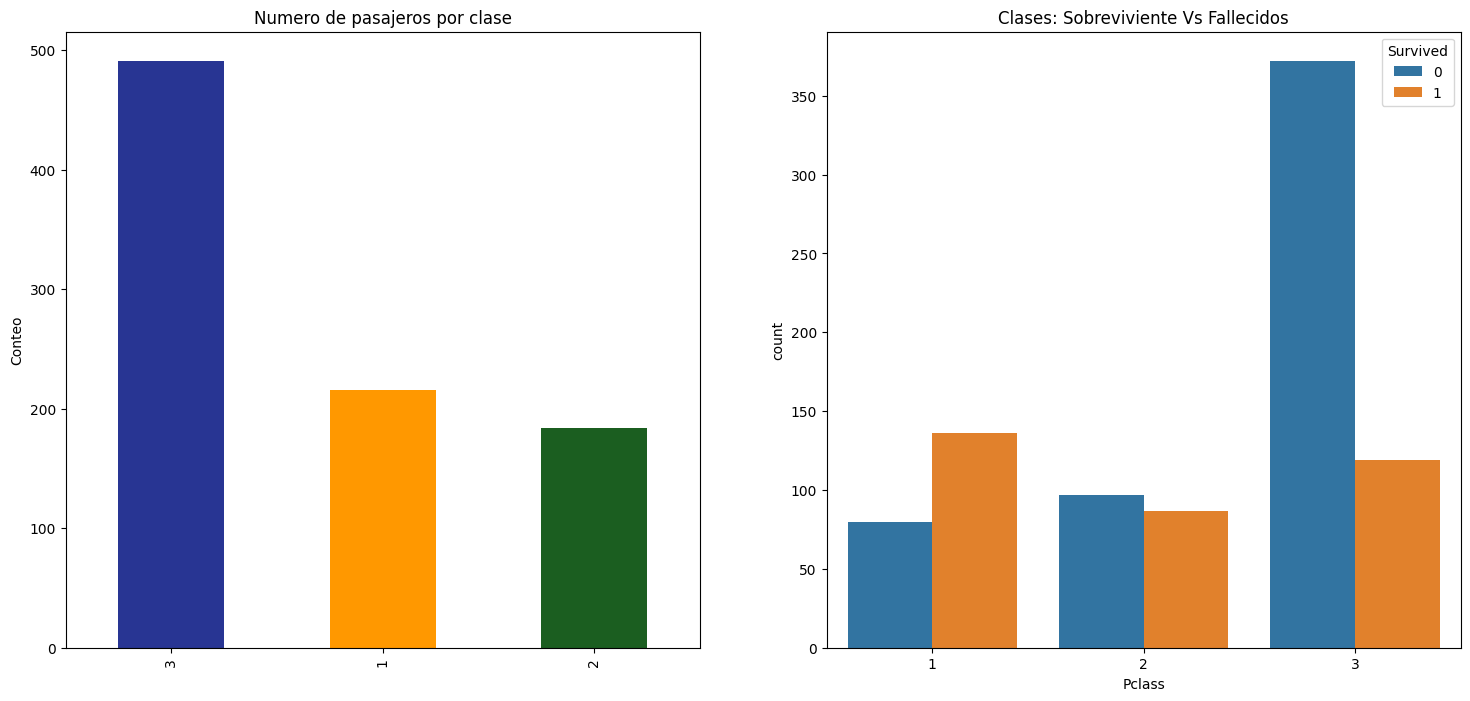

In [24]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#283593','#ff9800','#1b5e20'], ax=ax[0])
ax[0].set_title('Numero de pasajeros por clase')
ax[0].set_ylabel('Conteo')

sns.countplot(data=data, x='Pclass', hue='Survived')
ax[1].set_title('Clases: Sobreviviente Vs Fallecidos')

plt.show()

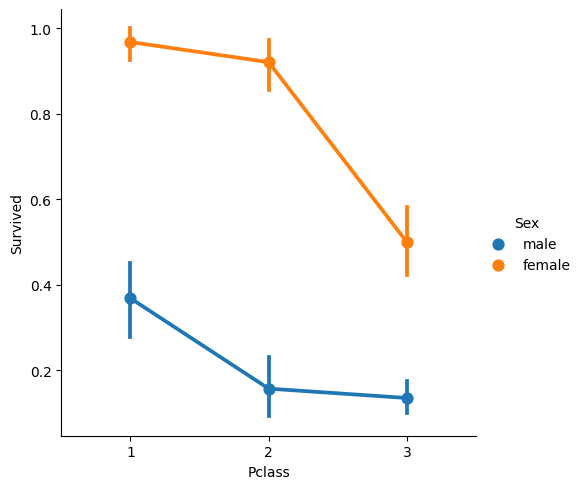

In [25]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data,kind="point")
plt.show()

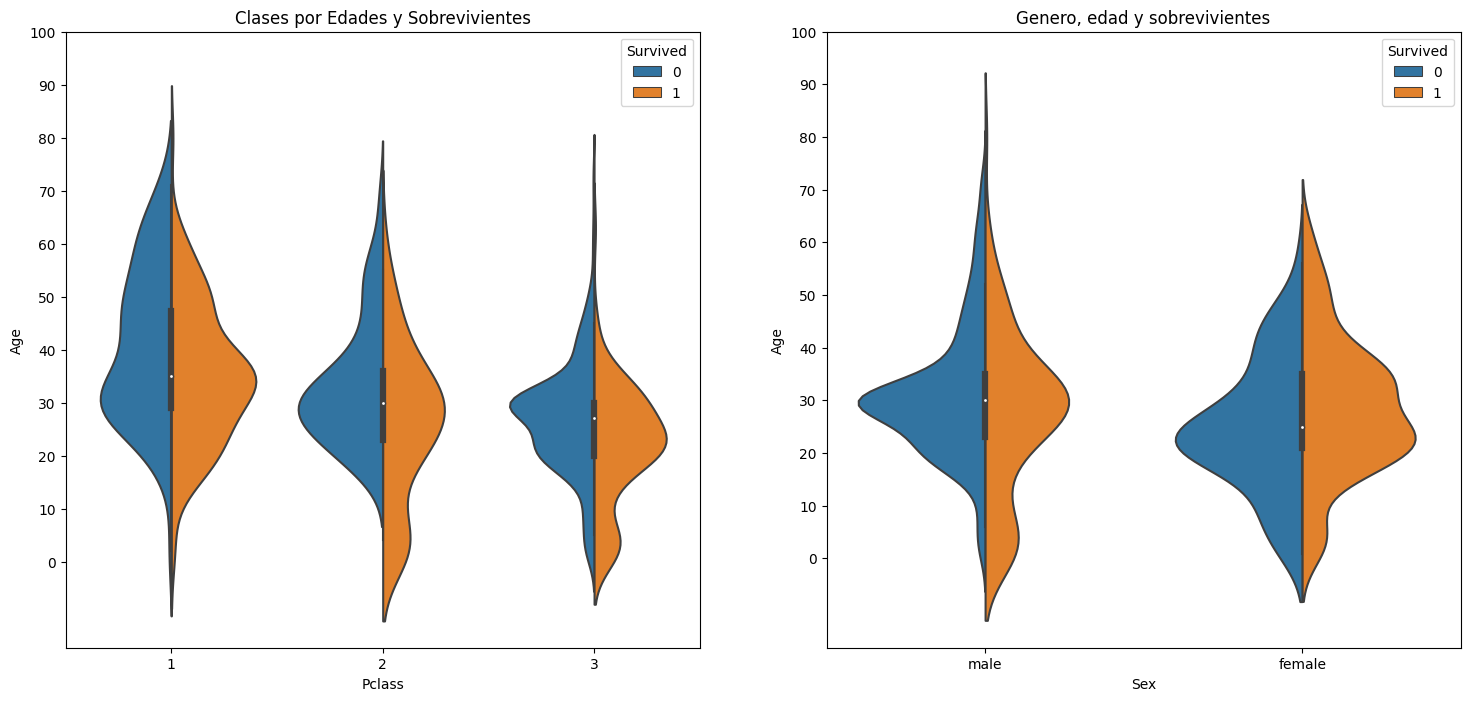

In [26]:
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot(x='Pclass',y='Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Clases por Edades y Sobrevivientes')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(x='Sex', y='Age', hue='Survived',data=data, split=True, ax=ax[1] )
ax[1].set_title('Genero, edad y sobrevivientes')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

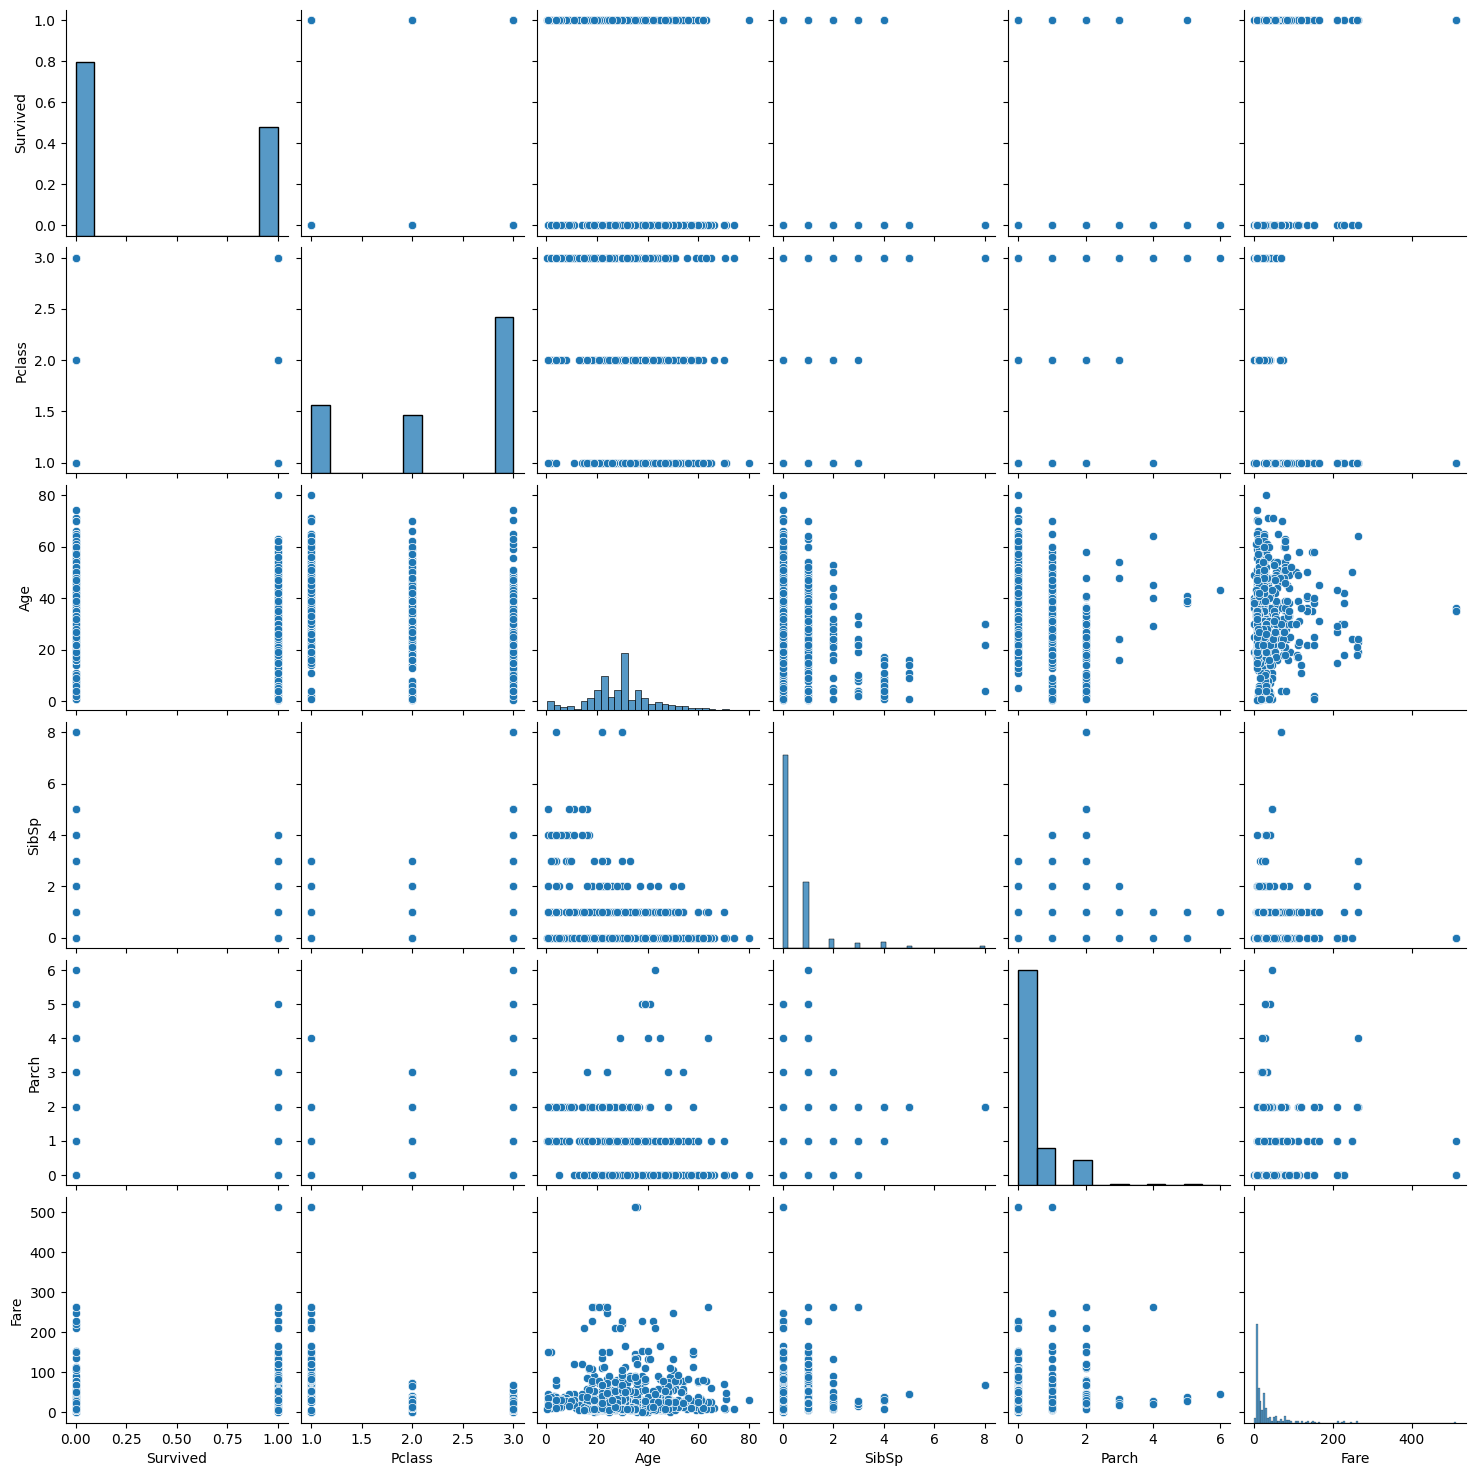

In [27]:
sns.pairplot(data)

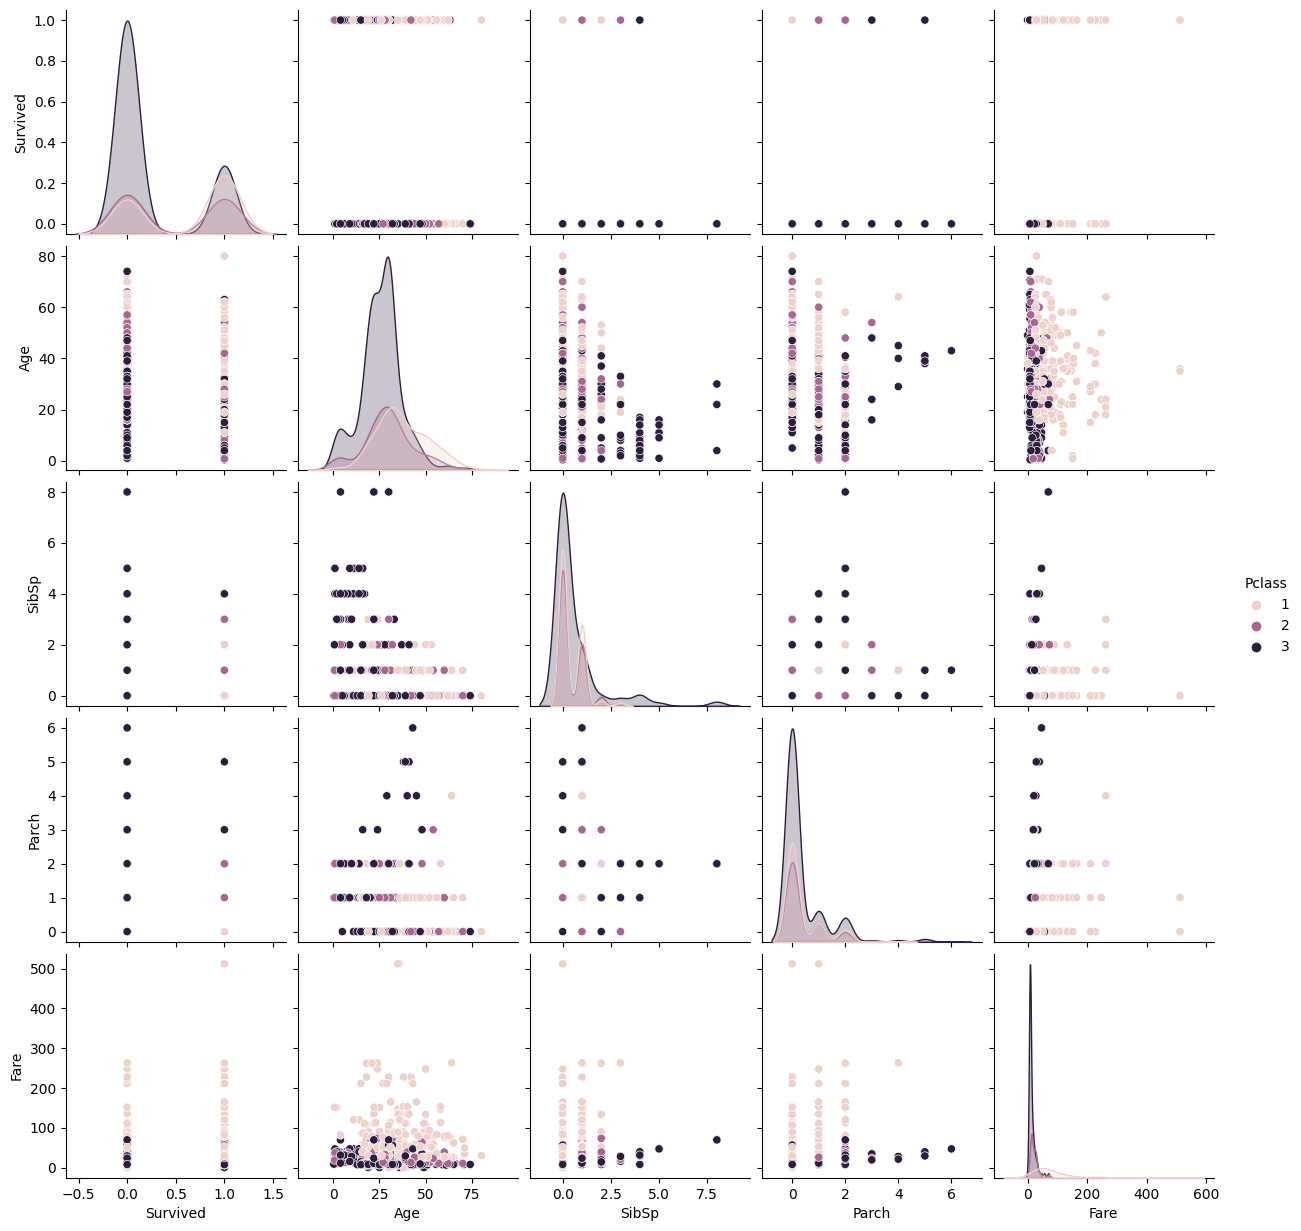

In [28]:
sns.pairplot(data, hue="Pclass")

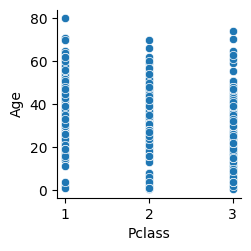

In [29]:
sns.pairplot(
    data,
    x_vars=['Pclass'],
    y_vars=['Age'],
)

<Axes: xlabel='Fare', ylabel='Age'>

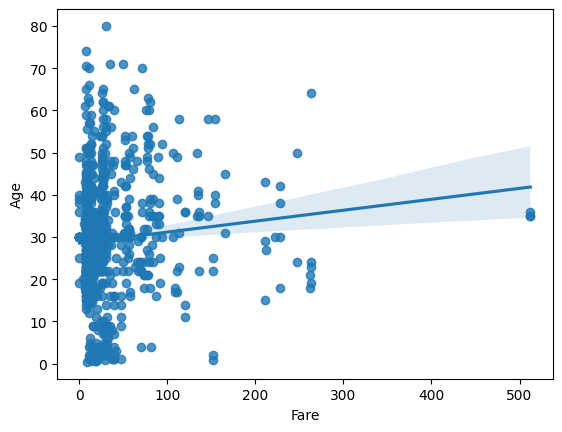

In [30]:
sns.regplot(x="Fare", y="Age", data=data)

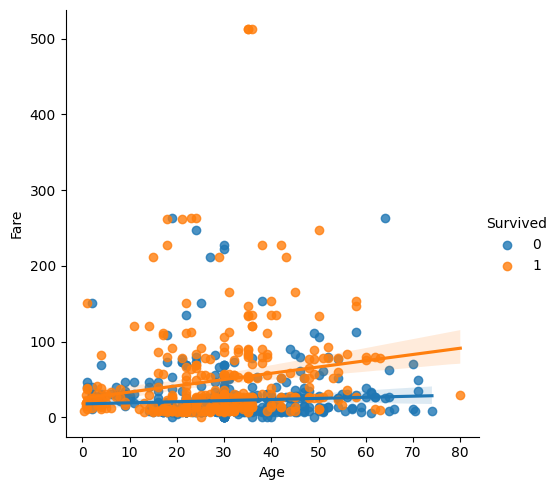

In [31]:
sns.lmplot(x="Age", y="Fare", hue="Survived", data=data)

In [32]:
##Eliminación de columnas innecesarias para el estudio - Name, Ticket e Inicial
data.drop(['Name','Ticket','Inicial'], axis=1, inplace=True)
## Sumar SibSp + Parch y si el valor es superior a cero colocar el valor de 1 de 
# lo contrario se sostiene en cero
data['Family'] = np.where(data['SibSp']+data['Parch']>0, 1,0)

data.drop(['SibSp','Parch'], axis=1, inplace=True)

In [33]:
##Convertir variables object a dummies
dataF = convDummies(data, 'Sex')

dataT = convDummies(dataF, 'Embarked')

dataT.drop(['male'], axis=1, inplace=True)

dataT.head()

,Survived,Pclass,Age,Fare,Family,female,C,Q,S
0,0,3,22.0,7.2500,1,0,0,0,1
1,1,1,38.0,71.2833,1,1,1,0,0
2,1,3,26.0,7.9250,0,1,0,0,1
3,1,1,35.0,53.1000,1,1,0,0,1
4,0,3,35.0,8.0500,0,0,0,0,1


In [34]:
##Cambiar encabezados y extracción en formato .csv
cambEncab(dataT, ['Sobreviviente','Clase','Edad','Pago','Familia','Genero','PuertoC','PuertoQ','PuertoS'])

export(dataT, 'dataLimpia.csv',',', False)

In [35]:
df = pd.DataFrame({'A': [1, 2], 'B': [10, 20]})


def square(x):
    return x * x


df1 = df.apply(square, )

#df1 = df.apply(lambda x: x * x)

#df['col_3'] = df.apply(lambda x: f(x.col_1, x.col_2), axis=1)

print(df)
print(df1)

   A   B
0  1  10
1  2  20
   A    B
0  1  100
1  4  400


#### Ciclo de vida de Machine Learning

In [36]:
#1. Entender el problema ?
#2. Extracción de la data
#3. Limpieza y Manipulación
#4. Graficas de Apoyo
#5. Test de Normalidad (Shapiro-wilk , Dagostino)
#6. Normalización
#7. Coeficiente de Correlación (Pearson, Spearman y Kendall)
#8. No hay correlación lineal (Power Prediction Score)
#9. Definir que algoritmo usar
#10.Ajuste de la data al tipo de algoritmo (RLineal - Arbol de decisión Predicción) - 
#RLOG - Arbol Clasificación 
#11. Entrenamiento y Testeo
#12. Evaluación de los modelos
#13. Best Features (Mejores características)
#14. Hiperparametrización
#15. Despliegue del Modelo (Streamlit)
#16. AutoML AWS - Monitoreo sagemaker canva
#17. Retroalimentación tiene los datos (Gobierno, Ingenieria de datos, base de datos, desarrollo)

#### **5. Test de Normalidad**

#### **5.1. Teorema del Limite Central**

El teorema del límite central en estadística afirma que, dado un tamaño de muestra suficientemente grande, la distribución de la media muestral de una variable se aproximará a una distribución normal independientemente de la que tenga esa variable en la distribución de la población.

#### **5.2. Asimetría**

El concepto de asimetría
La asimetría también es otra medida para comprobar la normalidad que nos indica la cantidad y la dirección de los puntos de datos asimétricos. Generalmente para el valor de Skewness:

Si el valor es inferior a -0,5, consideramos que la distribución es sesgada negativamente o sesgada a la izquierda, donde los puntos de datos se agrupan en el lado derecho y las colas son más largas en el lado izquierdo de la distribución.

Mientras que si el valor es superior a 0,5, consideramos que la distribución es sesgada positivamente o sesgada a la derecha, donde los puntos de datos se agrupan en el lado izquierdo y las colas son más largas en el lado derecho de la distribución.

Y, por último, si el valor está entre -0,5 y 0,5, consideramos que la distribución es aproximadamente simétrica.


#### **5.3. Curtosis**

¿Qué es la curtosis?
Otra medida numérica para comprobar la Normalidad es la Curtosis. La curtosis proporciona información sobre la distribución de las colas, que básicamente indica la distribución de los datos a lo largo de las colas.

Para el tipo simétrico de distribución, el valor de Kurtosis será cercano a Cero. Llamamos a este tipo de distribuciones distribución mesocúrtica. Sus colas son similares a las de la distribución de Gauss.

In [37]:
##Test de normalidad de Shapiro-wilk
##P > 0.05 = Normal - Candidata a predecirse - clasificar / target
##P < 0.05 = No normal - no son buenas candidatas para machine learning.
from scipy import stats
def testShapiroWilk(df):
        valoresP = []
        concepto = []
        variable = []
        for column in df:
            k2, p_value = stats.shapiro(df[column].values)
            valoresP.append(p_value)
            variable.append(column)
            if (p_value < 0.05):
                concepto.append('No es una variable Normal')
            else:
                concepto.append('Es una variable Normal')
        dfShapiro = pd.DataFrame(
            {'Variable': variable, 'Valores P': valoresP, 'Concepto': concepto})
        return dfShapiro

testShapiroWilk(dataT)

,Variable,Valores P,Concepto
0,Sobreviviente,1.794531e-40,No es una variable Normal
1,Clase,3.395832e-36,No es una variable Normal
2,Edad,4.907765e-13,No es una variable Normal
3,Pago,1.079000e-43,No es una variable Normal
4,Familia,2.623273e-40,No es una variable Normal
5,Genero,6.197383e-41,No es una variable Normal
6,PuertoC,4.203895e-45,No es una variable Normal
7,PuertoQ,0.000000e+00,No es una variable Normal
8,PuertoS,1.604487e-42,No es una variable Normal


In [38]:
dataT.head()

dataT.describe().T

,count,mean,std,min,25%,50%,75%,max
Sobreviviente,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Clase,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Edad,891.0,29.414332,13.224452,0.42,22.0000,30.0000,35.0,80.0000
Pago,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Familia,891.0,0.397306,0.489615,0.00,0.0000,0.0000,1.0,1.0000
Genero,891.0,0.352413,0.477990,0.00,0.0000,0.0000,1.0,1.0000
PuertoC,891.0,0.188552,0.391372,0.00,0.0000,0.0000,0.0,1.0000
PuertoQ,891.0,0.086420,0.281141,0.00,0.0000,0.0000,0.0,1.0000
PuertoS,891.0,0.725028,0.446751,0.00,0.0000,1.0000,1.0,1.0000


In [39]:
##Test de normalidad de D'agostino - Asimetría y curtosis
from scipy.stats import normaltest
def Dagostino(df):
        valoresP = []
        concepto = []
        variable = []
        for column in df:
            k2, p_value = normaltest(df[column].values)
            valoresP.append(p_value)
            variable.append(column)
            if (p_value < 0.05):
                concepto.append('No es una variable Normal')
            else:
                concepto.append('Es una variable Normal')
        dfDago = pd.DataFrame(
            {'Variable': variable, 'Valores P': valoresP, 'Concepto': concepto})
        return dfDago

Dagostino(dataT)

##Se evidencia la variable de Familia con un valor de p superior a 0.05 se acepta la hipótesis inicial
## asumiendo que es una variable normal candidata a usarse como predictora, clasificación o target.

,Variable,Valores P,Concepto
0,Sobreviviente,0.000000e+00,No es una variable Normal
1,Clase,0.000000e+00,No es una variable Normal
2,Edad,1.763379e-09,No es una variable Normal
3,Pago,3.727091e-197,No es una variable Normal
4,Familia,0.000000e+00,No es una variable Normal
5,Genero,0.000000e+00,No es una variable Normal
6,PuertoC,6.186597e-47,No es una variable Normal
7,PuertoQ,5.235746e-117,No es una variable Normal
8,PuertoS,3.592041e-62,No es una variable Normal


In [40]:
dataT.describe().T

,count,mean,std,min,25%,50%,75%,max
Sobreviviente,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Clase,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Edad,891.0,29.414332,13.224452,0.42,22.0000,30.0000,35.0,80.0000
Pago,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Familia,891.0,0.397306,0.489615,0.00,0.0000,0.0000,1.0,1.0000
Genero,891.0,0.352413,0.477990,0.00,0.0000,0.0000,1.0,1.0000
PuertoC,891.0,0.188552,0.391372,0.00,0.0000,0.0000,0.0,1.0000
PuertoQ,891.0,0.086420,0.281141,0.00,0.0000,0.0000,0.0,1.0000
PuertoS,891.0,0.725028,0.446751,0.00,0.0000,1.0000,1.0,1.0000


#### **6. Normalizar**

In [41]:
##Normalizar
##Librerias para preprocesamiento
from sklearn.preprocessing import MinMaxScaler, StandardScaler
def normaData(df):
    valores = df.values  
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(valores)

    pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=df.columns)

    normalizados = scaler.transform(valores)
    df_norm = pd.DataFrame(normalizados,
                       index=df.index,
                       columns=df.columns)
    return df_norm

##Función para Estandarizar -1 a 1 - Obligatorio(toda la data estar normal)
def stanData(df):
    scaler = StandardScaler()
    dataStan = scaler.fit_transform(df)
    df_stan = pd.DataFrame(dataStan, columns=df.columns)
    return df_stan

In [42]:
dataNorm = normaData(dataT)

dataNorm.describe().T

,count,mean,std,min,25%,50%,75%,max
Sobreviviente,891.0,0.383838,0.486592,0.0,0.000000,0.000000,1.000000,1.0
Clase,891.0,0.654321,0.418036,0.0,0.500000,1.000000,1.000000,1.0
Edad,891.0,0.364342,0.166178,0.0,0.271174,0.371701,0.434531,1.0
Pago,891.0,0.062858,0.096995,0.0,0.015440,0.028213,0.060508,1.0
Familia,891.0,0.397306,0.489615,0.0,0.000000,0.000000,1.000000,1.0
Genero,891.0,0.352413,0.477990,0.0,0.000000,0.000000,1.000000,1.0
PuertoC,891.0,0.188552,0.391372,0.0,0.000000,0.000000,0.000000,1.0
PuertoQ,891.0,0.086420,0.281141,0.0,0.000000,0.000000,0.000000,1.0
PuertoS,891.0,0.725028,0.446751,0.0,0.000000,1.000000,1.000000,1.0


#### **7. Coeficiente de Correlación**

La correlación definición de un variable con base en una o muchas variables:
cuanto subo de peso si me como tres pasteles a esta hora
Y= cuanto peso? - 90kg - 70%
X = promedio de comer pasteles en una semana, hora y fecha de cuando se comio los pasteles, 
    calidad de los ingredentes, Lugar=primitivo, corhuila, salida corhuila.

-1 a 1 = >= 0.5 quiere predección promedioSemana - Peso = 0,76 correctamente

Forecasting - tendencias a la alta o baja - ventas - series de tiempo. Ecommerce - Mercado Libre
Y = Aumento de mis ventas Helado
X = edad, valor de ingredentes, puntos vendo helado.

In [43]:
##Funcion para revisar la correlación
def tidy_corr(corr_mat):
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['Variable_1','Variable_2','R']
    corr_mat = corr_mat.loc[corr_mat['Variable_1']!= corr_mat['Variable_2'],:]
    corr_mat['abs_r'] = np.abs(corr_mat['R'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    return corr_mat

corr_matrix = dataNorm.corr(method='spearman')

dataCorre = tidy_corr(corr_matrix)

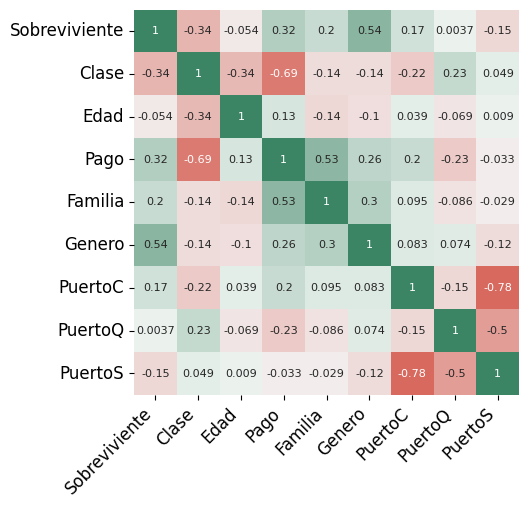

In [44]:
##Grafica correlación
fig , ax = plt.subplots(1,1, figsize=(5,5))

sns.heatmap(
    corr_matrix,
    annot=True,
    cbar=False,
    annot_kws={"size":8},
    vmin=-1,
    vmax=1,
    center =0,
    cmap=sns.diverging_palette(15,150, n=100),
    square=True,
    ax = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
)

ax.tick_params(labelsize=12)

In [45]:
from sklearn.utils import resample
###Oversample y under sample - Clasificación
dataNorm['Sobreviviente'].value_counts()

##Separar las clases mayoritaria - minoritaria
dataNormMayor = dataNorm[dataNorm.Sobreviviente==0]
dataNormMenor = dataNorm[dataNorm.Sobreviviente==1]

##Oversampling
df_minoritario = resample(dataNormMenor,
                          replace=True,
                          n_samples=549,
                          random_state=123)
##Combinacion de la data mayor unir data minoritaria que va a crecer
df_Over = pd.concat([dataNormMayor, df_minoritario])

df_Over.Sobreviviente.value_counts()

0.0    549
1.0    549
Name: Sobreviviente, dtype: int64

In [46]:
## Under Sampling
df_mayoritario = resample(dataNormMayor, 
                          replace=False,
                          n_samples=342,
                          random_state=123)

df_under = pd.concat([df_mayoritario, dataNormMenor])

df_under.Sobreviviente.value_counts()

0.0    342
1.0    342
Name: Sobreviviente, dtype: int64

#### **8. Power Prediction Score** 

In [51]:
## Correlacion no es lineal - PPS
##pip install -U ppscore
import ppscore as pps
pps.predictors(dataNorm, "Pago")

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Clase,Pago,0.194979,regression,True,mean absolute error,0.045888,0.036941,DecisionTreeRegressor()
1,Sobreviviente,Pago,0.000000,regression,True,mean absolute error,0.045888,0.052290,DecisionTreeRegressor()
2,Edad,Pago,0.000000,regression,True,mean absolute error,0.045888,0.056248,DecisionTreeRegressor()
3,Familia,Pago,0.000000,regression,True,mean absolute error,0.045888,0.050379,DecisionTreeRegressor()
4,Genero,Pago,0.000000,regression,True,mean absolute error,0.045888,0.053886,DecisionTreeRegressor()
5,PuertoC,Pago,0.000000,regression,True,mean absolute error,0.045888,0.051997,DecisionTreeRegressor()
6,PuertoQ,Pago,0.000000,regression,True,mean absolute error,0.045888,0.054272,DecisionTreeRegressor()
7,PuertoS,Pago,0.000000,regression,True,mean absolute error,0.045888,0.054300,DecisionTreeRegressor()


### Paso Modelado:

In [87]:
##Definir valor de X  y Y
X = dataNorm.drop(['Sobreviviente'], axis=1)
y = dataNorm['Sobreviviente']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

##Sacar los 4 grupos (2 train y 2 testeo)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.90, random_state=42)

##Entrenar el modelo
ml = LinearRegression()

ml.fit(X_train, y_train)

y_pred = ml.predict(X_test)

round(r2_score(y_test, y_pred),3)*100

##Con base en las variables independientes (x1,x2,x3) la predicción de sobreviviente llego a un valor
##de eficiencia del 50.1% ajustando a un 90% de datos de entrenamiento y 10% de testeo sobre un total
##891 datos. Se asume un margen de error del 50% lo cual indica que es un modelo no tan viable.


50.1

In [88]:
##Metricas
rmse = mean_squared_error(y_test, y_pred)

round(rmse, 6)

##0.00011222

0.11983

In [89]:
mldos = LinearRegression()

mldos.fit(X_test, y_test)

y_preddos = mldos.predict(X_test)

round(r2_score(y_test, y_preddos),3)*100

59.0

In [90]:
##Metricas
rmsedos = mean_squared_error(y_test, y_preddos)

round(rmsedos, 6)

##Modelo con datos train = eficiencia de 51%
##RMSE = 0.11

##Modelo dos con datos test = eficiencia del 59%
##RMSE = 0.0985

0.0985

<Axes: xlabel='Sobreviviente', ylabel='Density'>

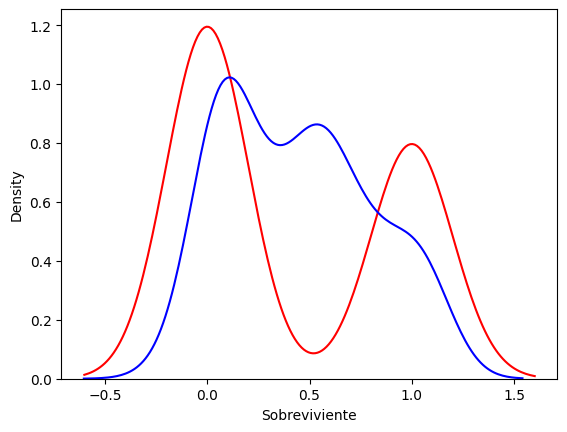

In [92]:
##Grafica del modelo
ax1 = sns.distplot(y_test, hist=False, color='r', label='Valores Actuales')
sns.distplot(y_pred, hist=False, color='b', label='Valores Predecidos')

<Axes: xlabel='Sobreviviente', ylabel='Density'>

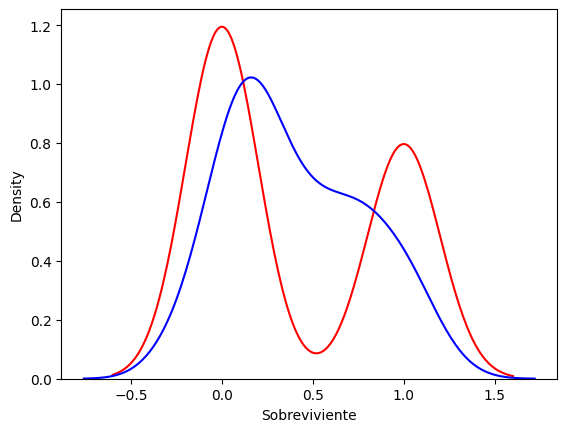

In [93]:
ax1 = sns.distplot(y_test, hist=False, color='r', label='Valores Actuales')
sns.distplot(y_preddos, hist=False, color='b', label='Valores Predecidos')

In [94]:
##Modelo OLS
##Agregar una constante entrenamiento X
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)

mlTres = sm.OLS(y_train, X_train_sm).fit()

mlTres.params

#y= mx + b

#Sobreviviente = 0.457783 * X_test + -0.361542+-0.351389+-0.022355

const      0.457783
Clase     -0.361542
Edad      -0.351389
Pago      -0.022355
Familia   -0.014989
Genero     0.493959
PuertoC    0.191211
PuertoQ    0.158100
PuertoS    0.108472
dtype: float64

In [96]:
print(mlTres.summary())

                            OLS Regression Results                            
Dep. Variable:          Sobreviviente   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     67.92
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           1.08e-76
Time:                        08:30:17   Log-Likelihood:                -370.29
No. Observations:                 801   AIC:                             756.6
Df Residuals:                     793   BIC:                             794.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4578      0.048      9.592      0.0

In [97]:
X_test_sm = sm.add_constant(X_test)

mlCuatro = sm.OLS(y_test, X_test_sm).fit()

mlCuatro.params

print(mlCuatro.summary())

                            OLS Regression Results                            
Dep. Variable:          Sobreviviente   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     16.83
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           1.39e-13
Time:                        08:33:14   Log-Likelihood:                -23.408
No. Observations:                  90   AIC:                             62.82
Df Residuals:                      82   BIC:                             82.81
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7379      0.119      6.202      0.0

Finaliza con denormalizar, guardado del modelo y despliegue con 
Streamlit - hiperparametrización - depliegue
